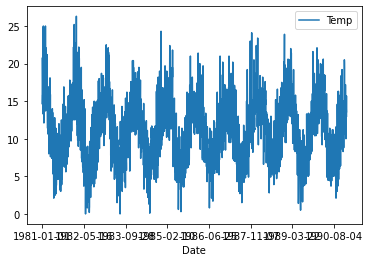

In [2]:
from pandas import read_csv
from matplotlib import pyplot
series = read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv', header=0, index_col=0)
series.plot()
pyplot.show()

In [68]:
url='https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv'

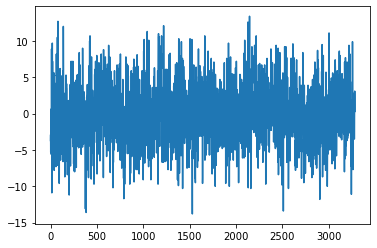

In [61]:
from pandas import read_csv
from matplotlib import pyplot
series = read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv', header=0, index_col=0)
X = series.values
diff = list()
days_in_year = 365
for i in range(days_in_year, len(X)):
    value = X[i] - X[i - days_in_year]
    diff.append(value)
pyplot.plot(diff)
pyplot.show()

In [10]:
series

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8
...,...
1990-12-27,14.0
1990-12-28,13.6
1990-12-29,13.5


                 Temp
Date                 
1981-01-31  17.712903
1981-02-28  17.678571
1981-03-31  13.500000
1981-04-30  12.356667
1981-05-31   9.490323
1981-06-30   7.306667
1981-07-31   7.577419
1981-08-31   7.238710
1981-09-30  10.143333
1981-10-31  10.087097
1981-11-30  11.890000
1981-12-31  13.680645
1982-01-31  16.567742


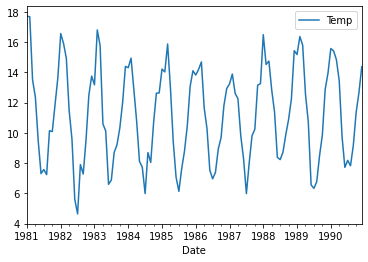

In [63]:
from pandas import read_csv
from matplotlib import pyplot
series = read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv', header=0, index_col=0,parse_dates=True)
resample = series.resample('M')
monthly_mean = resample.mean()
print(monthly_mean.head(13))
monthly_mean.plot()
pyplot.show()

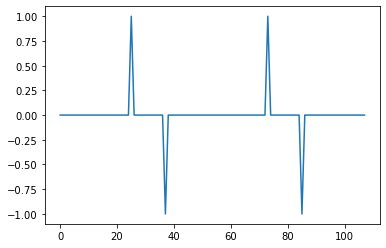

In [80]:
from pandas import read_csv
from matplotlib import pyplot
series = read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv', header=0, index_col=0,parse_dates=['Date'])
resample = series.resample('M')
monthly_mean = resample.mean()
X = series.values
diff = list()
months_in_year = 12
for i in range(months_in_year, len(monthly_mean)):
	value = monthly_mean.index[i].day - monthly_mean.index[i - months_in_year].day
	diff.append(value)
pyplot.plot(diff)
pyplot.show()

<ipython-input-70-850bfde48892>:9: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  month_mean_last_year = series[month_str].mean()


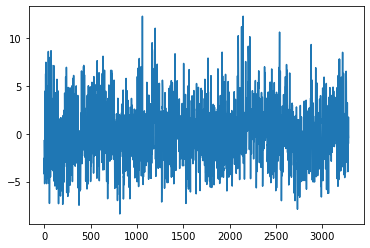

In [70]:
from pandas import read_csv
from matplotlib import pyplot
series = read_csv(url, header=0, index_col=0,parse_dates=['Date'])
X = series.values
diff = list()
days_in_year = 365
for i in range(days_in_year, len(X)):
	month_str = str(series.index[i].year-1)+'-'+str(series.index[i].month)
	month_mean_last_year = series[month_str].mean()
	value = X[i] - month_mean_last_year
	diff.append(value)
pyplot.plot(diff)
pyplot.show()

Coefficients: [[-1.17308000e-08]
 [ 9.30253946e-06]
 [-2.15977594e-03]
 [ 1.19147966e-01]
 [ 1.38980178e+01]]


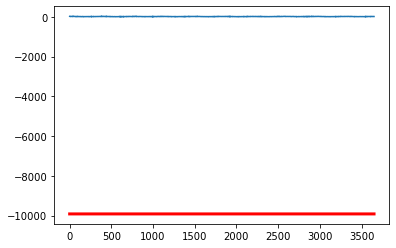

In [89]:
from pandas import read_csv
from matplotlib import pyplot
from numpy import polyfit
series = read_csv(url, header=0, index_col=0)
# fit polynomial: x^2*b1 + x*b2 + ... + bn
X = [i%365 for i in range(0, len(series))]
y = series.values
degree = 4
coef = polyfit(X, y, degree)
print('Coefficients: %s' % coef)
# create curve
curve = list()
for i in range(len(X)):
	value = coef[-1]
	for d in range(degree):
		value += X[i]**(degree-d) * coef[d]
	curve.append(value)
# plot curve over original data
pyplot.plot(series.values)
pyplot.plot(curve, color='red', linewidth=3)
pyplot.show()

Coefficients: [[-1.17308000e-08]
 [ 9.30253946e-06]
 [-2.15977594e-03]
 [ 1.19147966e-01]
 [ 1.38980178e+01]]


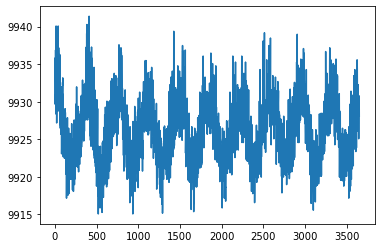

In [73]:
from pandas import read_csv
from matplotlib import pyplot
from numpy import polyfit
series = read_csv(url, header=0, index_col=0)
# fit polynomial: x^2*b1 + x*b2 + ... + bn
X = [i%365 for i in range(0, len(series))]
y = series.values
degree = 4
coef = polyfit(X, y, degree)
print('Coefficients: %s' % coef)
# create curve
curve = list()
for i in range(len(X)):
	value = coef[-1]
	for d in range(degree):
		value += X[i]**(degree-d) * coef[d]
	curve.append(value)
# create seasonally adjusted
values = series.values
diff = list()
for i in range(len(values)):
	value = values[i] - curve[i]
	diff.append(value)
pyplot.plot(diff)
pyplot.show()